In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

    Take a look at the first 10 rows.  
    Look at the last 5 rows. Do you see a problem?  
    Redo the read_csv() call to correct this issue - do not modify the original csv file.  



In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv',
                     nrows = 6868
                    )

#nrows is used to cut the footer off the bottom of the file.

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [5]:
#gdp_df = gdp_df.drop('Value Footnotes',
                    #axis = 1
                   # )

In [6]:
#gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country',
                                 # 'Value': 'GDP_Per_Capita'
                                 #})

In [7]:
gdp_df = (gdp_df
          .drop('Value Footnotes',
                axis = 1)
          .rename(columns = {'Country or Area': 'Country',
                             'Value': 'GDP_Per_Capita'})
               )

In [8]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [9]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [10]:
gdp_df.value_counts('Year')

Year
2017    238
2016    238
2015    238
2014    238
2013    238
2011    237
2018    237
2012    237
2009    236
2010    236
2006    235
2007    235
2008    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
dtype: int64

The years 1990-2019 are included in the data. The number of observations increased from 207 to 238 over the timespan, until 2017 when it began decreasing.

9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [11]:
gdp_df.value_counts('Country')

Country
Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Length: 238, dtype: int64

In [12]:
gdp_df[gdp_df['Country'] == 'Djibouti']

,Country,Year,GDP_Per_Capita
1477,Djibouti,2019,5534.749116
1478,Djibouti,2018,5214.088499
1479,Djibouti,2017,4885.220563
1480,Djibouti,2016,4709.549234
1481,Djibouti,2015,4488.827214
1482,Djibouti,2014,4238.996239
1483,Djibouti,2013,4028.446052


There are 238 countries in the data. Nauru, The Cayman Islands, Sint Maarten, Turks and Caicos Islands, and Djibouti are the least represented in the data. 

10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [13]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [14]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470


11. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [15]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

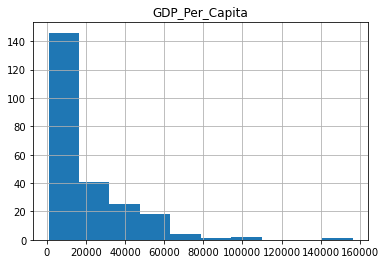

In [16]:
gdp_2014.hist('GDP_Per_Capita',
              bins = 10
             )

The distribution is right skewed.

13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [17]:
gdp_2014.sort_values('GDP_Per_Capita', ascending = False).head()

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [18]:
gdp_2014.sort_values('GDP_Per_Capita', ascending = False).tail()

,Country,Year,GDP_Per_Capita
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777
1047,Central African Republic,2014,822.610458


14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [19]:
gdp_pivoted= gdp_df.pivot_table(index = 'Country',
                                columns = 'Year').dropna(subset = [('GDP_Per_Capita', 1990),('GDP_Per_Capita', 2017)])

In [20]:
gdp_pivoted

GDP_Per_Capita                                            \
Year                          1990          1991          1992          1993   
Country                                                                        
Albania                4842.734635   3507.746654   3275.444336   3610.520633   
Algeria                8746.352901   8431.385028   8383.770248   8027.376688   
Angola                 5783.429064   5649.782130   5148.252824   3788.508107   
Antigua and Barbuda   15459.551675  15586.896172  15497.464744  15991.764201   
Arab World             9694.667544   9651.626577   9933.531454   9927.649928   
...                            ...           ...           ...           ...   
Vanuatu                2888.309393   2897.327707   2886.920558   2824.882319   
Vietnam                1673.249634   1736.014139   1847.620675   1957.644497   
World                  9680.269697   9645.256163   9647.070526   9657.888486   
Zambia                 2190.182814   2133.689042   2045.973257   2133.263108   
Zimbabwe               3324.348171   3426.598094   3054.889178   3033.504852   

                                                                             \
Year                         1994          1995          1996          1997   
Country                                                                       
Albania               3934.375728   4486.152092   4924.905836   4414.631173   
Algeria               7792.085182   7935.179841   8116.962721   8074.759953   
Angola                3717.366881   4139.640473   4551.651329   4728.157560   
Antigua and Barbuda  16697.248772  15628.396992  16303.723892  16828.640823   
Arab World            9957.387061   9913.934988  10136.058519  10311.064917   
...                           ...           ...           ...           ...   
Vanuatu               2999.097317   2956.627999   2962.647258   3051.178566   
Vietnam               2091.599402   2252.633886   2425.526266   2587.055148   
World                 9783.828893   9943.132889  10167.967706  10396.385330   
Zambia                1902.393940   1908.699005   1974.616550   1994.849503   
Zimbabwe              3263.934978   3226.413930   3520.430146   3580.048793   

                                                 ...                \
Year                         1998          1999  ...          2010   
Country                                          ...                 
Albania               4834.778357   5492.654212  ...  10783.816180   
Algeria               8360.150339   8506.345679  ...  10970.705149   
Angola                4792.683851   4740.669833  ...   7692.434616   
Antigua and Barbuda  17258.964856  17551.305968  ...  18205.985369   
Arab World           10624.718674  10606.027497  ...  13347.112066   
...                           ...           ...  ...           ...   
Vanuatu               3033.908413   2989.091261  ...   3239.887824   
Vietnam               2701.770578   2797.785536  ...   5089.411248   
World                10508.291266  10731.543649  ...  13904.629132   
Zambia                1933.003375   1968.215803  ...   3125.529308   
Zimbabwe              3653.920016   3600.849291  ...   2273.200073   

                                                                             \
Year                         2011          2012          2013          2014   
Country                                                                       
Albania              11088.087801  11263.851342  11397.576226  11623.866679   
Algeria              11078.240516  11233.534926  11319.097949  11512.705405   
Angola                7675.445768   8036.690482   8140.527851   8239.828837   
Antigua and Barbuda  17604.417102  17965.502327  17641.542533  18104.241470   
Arab World           13531.438796  14032.961703  14155.876986  14219.562395   
...                           ...           ...           ...           ...   
Vanuatu               3192.453639   3159.338400   3131.971868   3116.077025   
Vietnam              

In [21]:
gdp_pivoted.columns

MultiIndex([('GDP_Per_Capita', 1990),
            ('GDP_Per_Capita', 1991),
            ('GDP_Per_Capita', 1992),
            ('GDP_Per_Capita', 1993),
            ('GDP_Per_Capita', 1994),
            ('GDP_Per_Capita', 1995),
            ('GDP_Per_Capita', 1996),
            ('GDP_Per_Capita', 1997),
            ('GDP_Per_Capita', 1998),
            ('GDP_Per_Capita', 1999),
            ('GDP_Per_Capita', 2000),
            ('GDP_Per_Capita', 2001),
            ('GDP_Per_Capita', 2002),
            ('GDP_Per_Capita', 2003),
            ('GDP_Per_Capita', 2004),
            ('GDP_Per_Capita', 2005),
            ('GDP_Per_Capita', 2006),
            ('GDP_Per_Capita', 2007),
            ('GDP_Per_Capita', 2008),
            ('GDP_Per_Capita', 2009),
            ('GDP_Per_Capita', 2010),
            ('GDP_Per_Capita', 2011),
            ('GDP_Per_Capita', 2012),
            ('GDP_Per_Capita', 2013),
            ('GDP_Per_Capita', 2014),
            ('GDP_Per_Capita', 2015),
            

15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [22]:
gdp_pivoted['Percent_Change'] = (((gdp_pivoted['GDP_Per_Capita', 2017] - 
                                   gdp_pivoted['GDP_Per_Capita', 1990]) / 
                                  gdp_pivoted['GDP_Per_Capita', 1990]) * 100).round()

In [23]:
gdp_pivoted

GDP_Per_Capita                                            \
Year                          1990          1991          1992          1993   
Country                                                                        
Albania                4842.734635   3507.746654   3275.444336   3610.520633   
Algeria                8746.352901   8431.385028   8383.770248   8027.376688   
Angola                 5783.429064   5649.782130   5148.252824   3788.508107   
Antigua and Barbuda   15459.551675  15586.896172  15497.464744  15991.764201   
Arab World             9694.667544   9651.626577   9933.531454   9927.649928   
...                            ...           ...           ...           ...   
Vanuatu                2888.309393   2897.327707   2886.920558   2824.882319   
Vietnam                1673.249634   1736.014139   1847.620675   1957.644497   
World                  9680.269697   9645.256163   9647.070526   9657.888486   
Zambia                 2190.182814   2133.689042   2045.973257   2133.263108   
Zimbabwe               3324.348171   3426.598094   3054.889178   3033.504852   

                                                                             \
Year                         1994          1995          1996          1997   
Country                                                                       
Albania               3934.375728   4486.152092   4924.905836   4414.631173   
Algeria               7792.085182   7935.179841   8116.962721   8074.759953   
Angola                3717.366881   4139.640473   4551.651329   4728.157560   
Antigua and Barbuda  16697.248772  15628.396992  16303.723892  16828.640823   
Arab World            9957.387061   9913.934988  10136.058519  10311.064917   
...                           ...           ...           ...           ...   
Vanuatu               2999.097317   2956.627999   2962.647258   3051.178566   
Vietnam               2091.599402   2252.633886   2425.526266   2587.055148   
World                 9783.828893   9943.132889  10167.967706  10396.385330   
Zambia                1902.393940   1908.699005   1974.616550   1994.849503   
Zimbabwe              3263.934978   3226.413930   3520.430146   3580.048793   

                                                 ...                \
Year                         1998          1999  ...          2011   
Country                                          ...                 
Albania               4834.778357   5492.654212  ...  11088.087801   
Algeria               8360.150339   8506.345679  ...  11078.240516   
Angola                4792.683851   4740.669833  ...   7675.445768   
Antigua and Barbuda  17258.964856  17551.305968  ...  17604.417102   
Arab World           10624.718674  10606.027497  ...  13531.438796   
...                           ...           ...  ...           ...   
Vanuatu               3033.908413   2989.091261  ...   3192.453639   
Vietnam               2701.770578   2797.785536  ...   5352.011422   
World                10508.291266  10731.543649  ...  14275.461871   
Zambia                1933.003375   1968.215803  ...   3201.289398   
Zimbabwe              3653.920016   3600.849291  ...   2556.278431   

                                                                             \
Year                         2012          2013          2014          2015   
Country                                                                       
Albania              11263.851342  11397.576226  11623.866679  11916.422315   
Algeria              11233.534926  11319.097949  11512.705405  11696.963757   
Angola                8036.690482   8140.527851   8239.828837   8036.410610   
Antigua and Barbuda  17965.502327  17641.542533  18104.241470  18595.084904   
Arab World           14032.961703  14155.876986  14219.562395  14441.436785   
...                           ...           ...           ...           ...   
Vanuatu               3159.338400   3131.971868   3116.077025   3037.784742   
Vietnam              

16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [24]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]

GDP_Per_Capita                                \
Year                               1990           1991           1992   
Country                                                                 
Brunei                     71230.862143   71404.841658   72704.666223   
Burundi                     1184.842440    1215.886531    1202.107139   
Central African Republic    1201.677234    1165.239450    1060.638246   
Comoros                     3061.360665    2812.289135    2964.257464   
Congo                       5115.210903    5095.961614    5087.002267   
Dem. Rep. Congo             1819.723315    1606.326515    1382.762098   
Gabon                      18179.265733   18770.642205   17704.420511   
Guinea-Bissau               1994.669656    2049.613967    2025.799880   
Haiti                       3229.618638    3225.867045    2995.781030   
Kyrgyz Republic             5158.317569    4671.522849    3978.909913   
Madagascar                  1853.051624    1686.155508    1656.344494   
Tajikistan                  3869.043636    3516.595717    2450.561645   
The Bahamas                38099.848616   35837.327884   33815.827861   
The Gambia                  2265.238219    2248.376030    2245.612991   
Ukraine                    15751.722440   14396.632702   12962.935705   
United Arab Emirates      111454.360446  106103.881293  103470.974979   
Zimbabwe                    3324.348171    3426.598094    3054.889178   

                                                                      \
Year                              1993           1994           1995   
Country                                                                
Brunei                    70909.563397   71175.850137   72446.413958   
Burundi                    1105.228876    1044.715537     947.822368   
Central African Republic   1033.830619    1053.746606    1098.896607   
Comoros                    2966.196546    2730.645761    2751.164083   
Congo                      4899.579377    4502.959478    4552.379904   
Dem. Rep. Congo            1150.836259    1066.468119    1039.752990   
Gabon                     17917.062601   18099.344359   18514.653304   
Guinea-Bissau              2022.604860    2042.457391    2088.247630   
Haiti                      2779.601440    2401.826183    2591.091811   
Kyrgyz Republic            3362.829000    2688.351778    2517.284450   
Madagascar                 1641.211819    1591.419886    1569.037568   
Tajikistan                 2015.404433    1562.145894    1347.858839   
The Bahamas               33289.240363   33742.846369   34675.056267   
The Gambia                 2240.451407    2175.518337    2127.878498   
Ukraine                   11112.677652    8606.613502    7616.545726   
United Arab Emirates      98978.292429  100212.806805  101571.370612   
Zimbabwe                   3033.504852    3263.934978    3226.413930   

                                                                       \
Year                               1996           1997           1998   
Country                                                                 
Brunei                     72694.674833   69940.873963   67984.221114   
Burundi                      861.482737     839.196845     870.044082   
Central African Republic    1027.650659    1055.256506    1078.451654   
Comoros                     2642.082954    2675.593277    2639.282366   
Congo                       4614.302664    4455.181770    4489.594472   
Dem. Rep. Congo             1000.689081     921.422664     885.785915   
Gabon                      18702.981797   19284.428798   19465.245278   
Guinea-Bissau               2284.373270    2386.291009    1683.251675   
Haiti                       2649.528359    2672.592351    2682.813535   
Kyrgyz Republic             2656.017720    2877.098569    2893.417534   
Madagascar                  1553.575906    1560.974497    1571.629112   
Tajikistan                  1106.160054    1108.263480    1149.913374   
The Bahamas                3

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

Bonus: Put both line charts on the same plot.

In [25]:
gdp_pivoted[gdp_pivoted['Percent_Change'] == gdp_pivoted['Percent_Change'].max()]

GDP_Per_Capita                                        \
Year                        1990        1991         1992         1993   
Country                                                                  
Equatorial Guinea    1039.985049  996.857617  1299.934196  1395.403468   

                                                                       \
Year                      1994         1995         1996         1997   
Country                                                                 
Equatorial Guinea  1572.065607  1781.264878  2857.452417  6868.480369   

                                             ...                              \
Year                      1998         1999  ...          2011          2012   
Country                                      ...                               
Equatorial Guinea  8166.052518  9851.190917  ...  35378.023284  36671.357436   

                                                                           \
Year                       2013          2014          2015          2016   
Country                                                                     
Equatorial Guinea  33678.706547  32436.466793  28313.602763  24827.072978   

                                                            Percent_Change  
Year                       2017          2018          2019                 
Country                                                                     
Equatorial Guinea  22551.083246  20359.845144  18558.003852         2068.0  

[1 rows x 31 columns]

In [26]:
gdp_pivoted['Percent_Change'].nlargest(2)

Country
Equatorial Guinea    2068.0
China                 907.0
Name: Percent_Change, dtype: float64

In [27]:
guinea = gdp_df[gdp_df['Country'] == 'Equatorial Guinea']

In [28]:
china = gdp_df[gdp_df['Country'] == 'China']

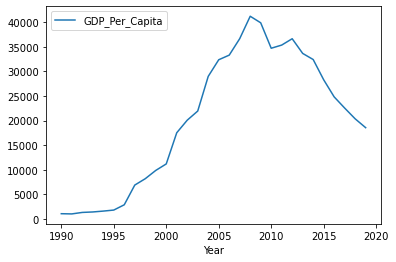

In [29]:
guinea.plot(x = 'Year',
           y = 'GDP_Per_Capita');

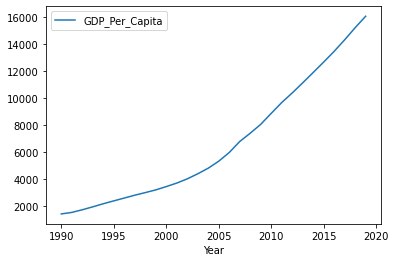

In [30]:
china.plot(x = 'Year',
          y = 'GDP_Per_Capita');

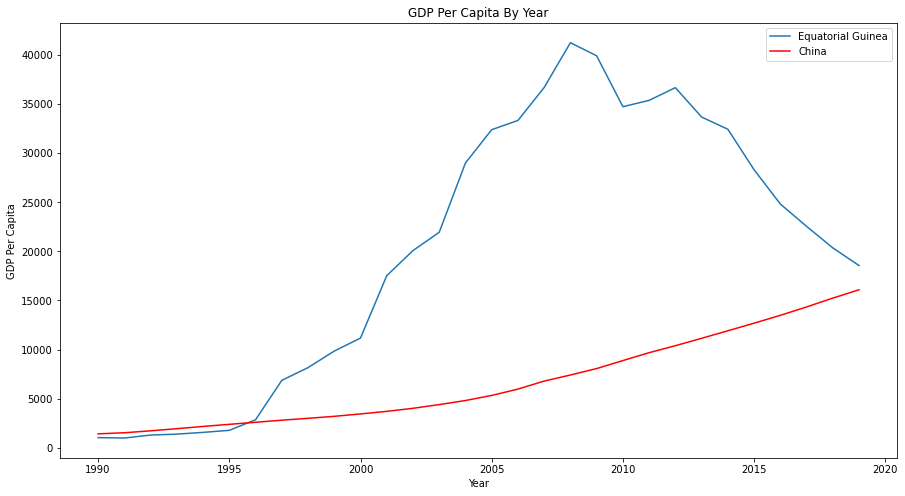

In [31]:
plt.figure(figsize = (15,8))
ax = plt.gca()

guinea.plot(kind='line',x='Year',y='GDP_Per_Capita',ax=ax)
china.plot(kind='line',x='Year',y='GDP_Per_Capita', color='red', ax=ax)

plt.legend(['Equatorial Guinea', 'China'])
plt.title('GDP Per Capita By Year')
plt.ylabel('GDP Per Capita');

18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [32]:
continents = pd.read_csv('../data/continents.csv')

In [33]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [34]:
gdp_df = gdp_df.merge(continents,
                    on = 'Country')

In [35]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa


20. Determine the number of countries per continent. Create a bar chart showing this.

In [36]:
continent_count = gdp_df.drop_duplicates(subset = ['Country']).value_counts('Continent')

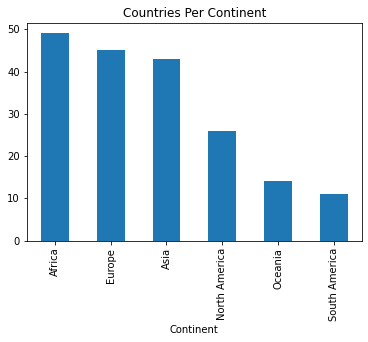

In [37]:
continent_count.plot(kind = 'bar',
                    title = 'Countries Per Continent');

21. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [38]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

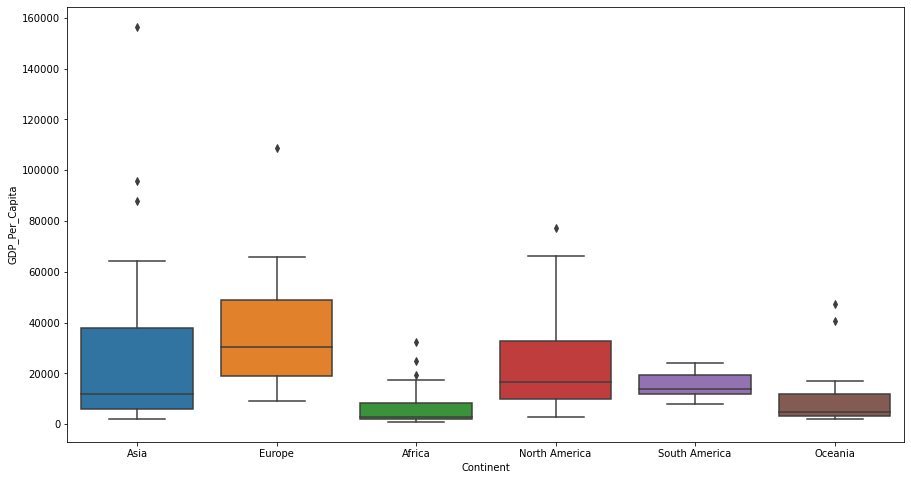

In [39]:
plt.figure(figsize=(15,8))

sns.boxplot(data = gdp_2014,
           x = 'Continent',
           y = 'GDP_Per_Capita');

Large Outliers in Asia and Eurpoe. Africa has the narrowest IQR and its overall spread looks similar to Oceania.

22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [40]:
internet_df = pd.read_csv('../data/internet_use.csv',
                         nrows = 4495)

In [41]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [42]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [43]:
internet_df = internet_df.drop('Value Footnotes', axis = 1).rename(columns = {'Country or Area': 'Country',
                                                                   'Value': 'Internet_Users_Pct'})

In [44]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [45]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [46]:
int_years = internet_df.groupby('Year').mean('Internet_Users_Pct')

In [47]:
int_years

,Internet_Users_Pct
Year,
1960,0.000000
1965,0.000000
1970,0.000000
1975,0.000000
1976,0.000000
1977,0.000000
1978,0.000000
1979,0.000000
1980,0.000000


1990 is the first year that there is a Internet_Users_Pct over 0.

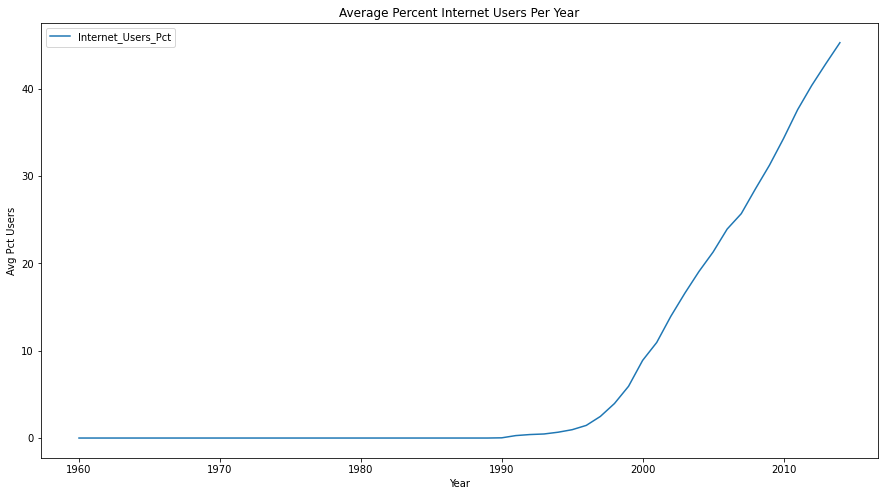

In [48]:
plt.figure(figsize=(15,8))

sns.lineplot(data = int_years)

plt.title('Average Percent Internet Users Per Year')
plt.ylabel('Avg Pct Users');

26. Merge gdp_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. 

Keep only countries and years that appear in both tables.

Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [49]:
gdp_and_internet_use = gdp_df.merge(internet_df,
                                   on = ['Country', 'Year'])

27. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [50]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,Asia,6.390000
1,Afghanistan,2013,2116.465454,Asia,5.900000
2,Afghanistan,2012,2075.491747,Asia,5.454545
3,Afghanistan,2011,1904.559799,Asia,5.000000
4,Afghanistan,2010,1957.029338,Asia,4.000000


In [51]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3453,Zimbabwe,1997,3580.048793,Africa,0.033080
3454,Zimbabwe,1996,3520.430146,Africa,0.016790
3455,Zimbabwe,1995,3226.413930,Africa,0.007684
3456,Zimbabwe,1994,3263.934978,Africa,0.001739
3457,Zimbabwe,1990,3324.348171,Africa,0.000000


28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. How many countries have at least 90% internet users in 2014?

In [52]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [53]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,Asia,6.39
13,Albania,2014,11623.866679,Europe,60.10
34,Algeria,2014,11512.705405,Africa,18.09
56,Angola,2014,8239.828837,Africa,21.26
76,Antigua and Barbuda,2014,18104.241470,North America,64.00


In [54]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] > 90].value_counts('Country')

Country
Bahrain                 1
Bermuda                 1
Denmark                 1
Finland                 1
Iceland                 1
Japan                   1
Luxembourg              1
Netherlands             1
Norway                  1
Qatar                   1
Sweden                  1
United Arab Emirates    1
United Kingdom          1
dtype: int64

In [55]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Country'] == 'United States']

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3326,United States,2014,57273.129074,North America,87.36


There are 13 countries that had at least 90% internet use in 2014. The U.S. was not one, with 87.36%

29. Find the countries that had the top 3 largest GDP per capita figures for 2014. 

Create a seaborn FacetGrid showing the change in internet user percentage over time for these three countries. Each individual figure in the facet grid will represent a single country. 

What trends do you notice?

In [56]:
gdp_and_internet_use_2014.sort_values('Internet_Users_Pct', ascending = False).head(3)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1381,Iceland,2014,49652.149500,Europe,98.16
372,Bermuda,2014,77361.104881,North America,96.80
2296,Norway,2014,62589.373548,Europe,96.30


In [67]:
int_top_three = ['Iceland', 'Bermuda', 'Norway']
top_three = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(int_top_three)]

In [68]:
top_three

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
372,Bermuda,2014,77361.104881,North America,96.800000
373,Bermuda,2013,80503.650291,North America,95.300000
374,Bermuda,2012,80982.367755,North America,91.299305
375,Bermuda,2011,85829.378260,North America,88.336000
376,Bermuda,2010,88399.915949,North America,84.210000
...,...,...,...,...,...
2316,Norway,1994,47693.591612,Europe,4.152450
2317,Norway,1993,45657.734294,Europe,2.783991
2318,Norway,1992,44659.602400,Europe,2.216366
2319,Norway,1991,43367.971303,Europe,1.407395


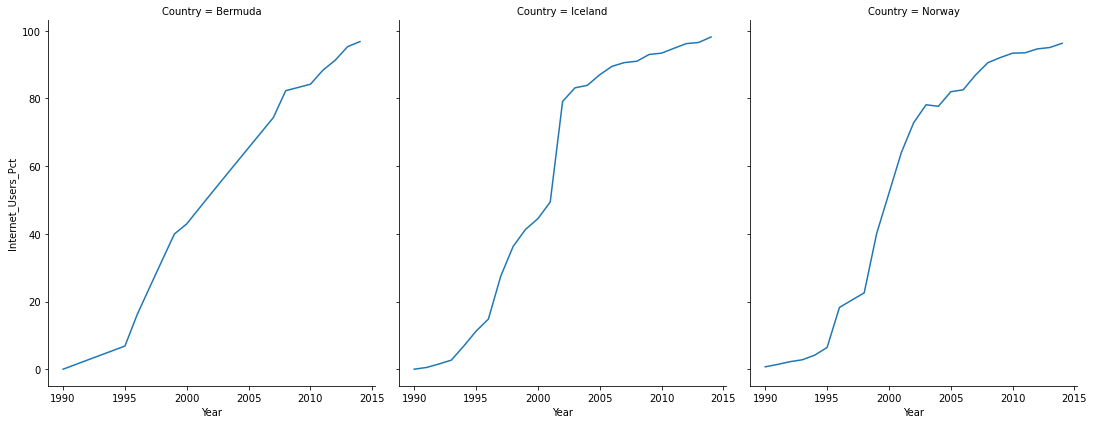

In [88]:
g = sns.FacetGrid(top_three,
                  col = 'Country',
                  height = 6,
                  aspect = .85)

g.map(sns.lineplot, "Year","Internet_Users_Pct");

30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

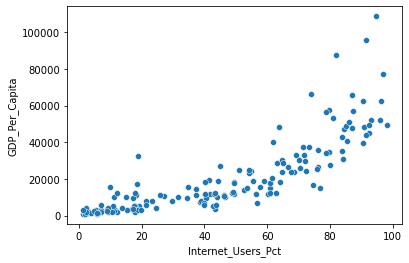

In [92]:
sns.scatterplot(data = gdp_and_internet_use_2014,
               x = 'Internet_Users_Pct',
               y = 'GDP_Per_Capita');

There appears to be a positive realtionship between internet use and GDP per Capita. There are also some outliers where there is a high GDP and a low use rate and vice versa.

31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

In [93]:
gdp_and_internet_use_2014.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct
Year,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.824627
Internet_Users_Pct,NaN,0.824627,1.000000


The correlation is a number between 0 and 1, with a stronger correlation indicated as the number nears 1.

32. Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

In [95]:
gdp_and_internet_use_2014['log_GDP_Per_Capita'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])

<ipython-input-95-7e66f71c4e2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['log_GDP_Per_Capita'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


In [97]:
gdp_and_internet_use_2014.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct,log_GDP_Per_Capita
Year,NaN,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.824627,0.864009
Internet_Users_Pct,NaN,0.824627,1.000000,0.903987
log_GDP_Per_Capita,NaN,0.864009,0.903987,1.000000


The correlation between internet users percentage and the log of GDP per capita is closer to 1 than the correlation between GDP per capita and internet users percentage.

33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [98]:
united_states = gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States']

In [99]:
united_states.corr()

,Year,GDP_Per_Capita,Internet_Users_Pct
Year,1.000000,0.96344,0.969113
GDP_Per_Capita,0.963440,1.00000,0.991660
Internet_Users_Pct,0.969113,0.99166,1.000000


The correlation between internet use and GDP per capita is higher than the international correlation between the same variables. There may be a stronger or weaker correlation between the two variables in other countries as well.

Difficult Bonus:

Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [112]:
gdp_names = set(list(gdp_df['Country'].unique()))

In [113]:
internet_names = set(list(internet_df['Country'].unique()))

In [114]:
gdp_names.difference(internet_names)

{'Brunei',
 'Cabo Verde',
 'Central African Republic',
 'Dem. Rep. Congo',
 'Dominican Republic',
 'Eswatini',
 'Hong Kong SAR, China',
 'Iran',
 'Korea',
 'Kosovo',
 'Kyrgyz Republic',
 'Lao PDR',
 'Macao SAR, China',
 'Micronesia',
 'North Macedonia',
 'St. Kitts and Nevis',
 'St. Lucia',
 'The Bahamas',
 'The Gambia',
 'Vietnam',
 'West Bank and Gaza'}

In [115]:
internet_names.difference(gdp_names)

{'American Samoa',
 'Andorra',
 'Bahamas',
 'Brunei Darussalam',
 'Cape Verde',
 'Central African Rep.',
 'Congo (Democratic Republic of the)',
 "Cote d'Ivoire",
 'Cuba',
 "Dem. People's Rep. of Korea",
 'Dominican Rep.',
 'Eritrea',
 'Faroe Islands',
 'French Guiana',
 'French Polynesia',
 'Gambia',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Guernsey',
 'Hong Kong, China',
 'Iran (Islamic Rep. of)',
 'Jersey',
 'Korea (Rep. of)',
 'Kyrgyzstan',
 'Lao P.D.R.',
 'Liechtenstein',
 'Macao, China',
 'Micronesia (Fed. States of)',
 'Monaco',
 'Netherlands Antilles',
 'New Caledonia',
 'Northern Marianas Islands',
 'Palestine',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Sao Tome and Principe',
 'Somalia',
 'South Sudan',
 'Swaziland',
 'Syria',
 'T.F.Y.R. Macedonia',
 'Venezuela',
 'Viet Nam',
 'Virgin Islands (U.S.)',
 'Yemen'}